In [1]:
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np

from src.v2.impl.conditions import StepCountCondition, PrecisionCondition, AbsolutePrecisionCondition
from src.v2.impl.methods import CoordinateDescent, GoldenRatioMethod
from src.v2.impl.metrics import StepCount, CallCount, GradientCallCount, HessianCallCount, PrecisionCount, \
    AbsolutePrecisionCount, AbsolutePrecision, MinAbsolutePrecision
from src.v2.impl.oraculs import LambdaOracul
from src.v2.runner.debug import FULL_DEBUG
from src.v2.runner.runner import Runner, FULL_VISUALIZE
from src.v2.visualization.animation import Animator, FULL_ANIMATION

============ Testing CoordinateDescent(300) ============
[DEBUG][Metric][AbsolutePrecision] Prepared oracul
[DEBUG][Metric][MinAbsolutePrecision] Prepared oracul
[DEBUG][Oracul] Added debug to oracul
[DEBUG][Oracul][Value] Evaluated at [126  30] - 14081
[DEBUG][Method][CoordinateDescent(300)] Initial state is CoordinateDescentState(point=array([126,  30]), eps=300, index=1, dim_num=2, temp_dim=0, dec=14081)
[DEBUG][Metric][AbsolutePrecision][1] 118.66338946785567
[DEBUG][Metric][MinAbsolutePrecision][1] 118.66338946785567
[DEBUG][Oracul][Value] Evaluated at [426.  30.] - 173681.0
[DEBUG][Oracul][Value] Evaluated at [-174.   30.] - 34481.0
[DEBUG][Oracul][Value] Evaluated at [126. 330.] - 119081.0
[DEBUG][Oracul][Value] Evaluated at [ 126. -270.] - 89081.0
[DEBUG][Oracul][Value] Evaluated at [276.  30.] - 71381.0
[DEBUG][Oracul][Value] Evaluated at [-24.  30.] - 1781.0
[DEBUG][Method][CoordinateDescent(300)][2][State] CoordinateDescentState(point=array([-24,  30]), eps=150.0, index=2, d

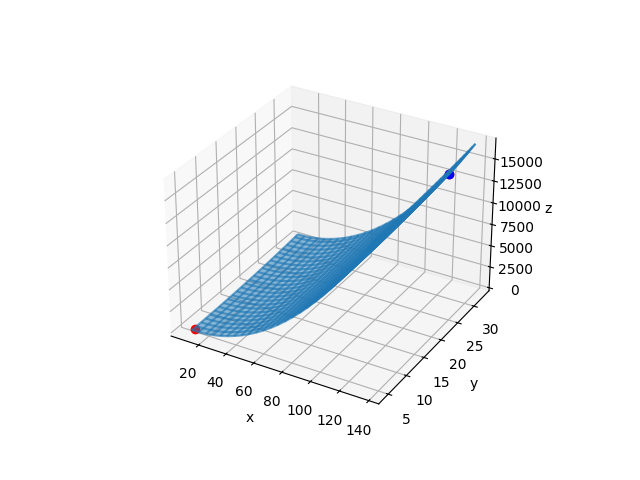

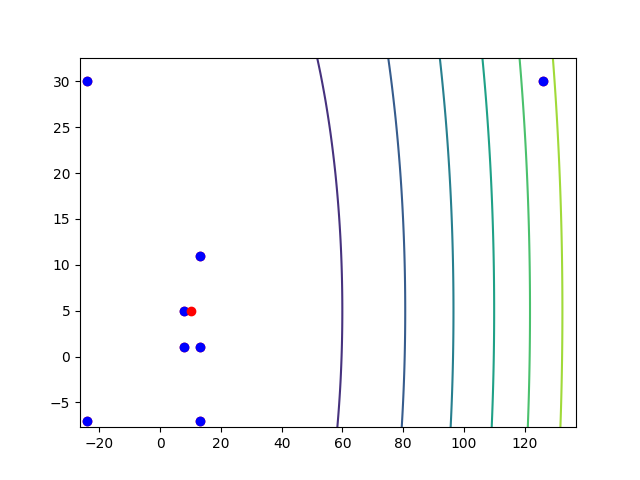

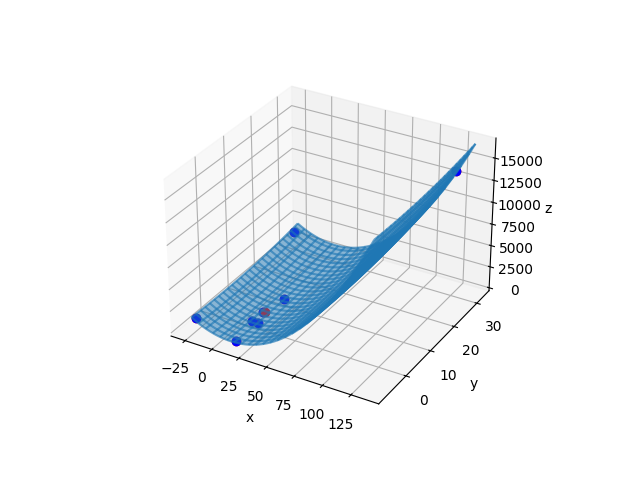

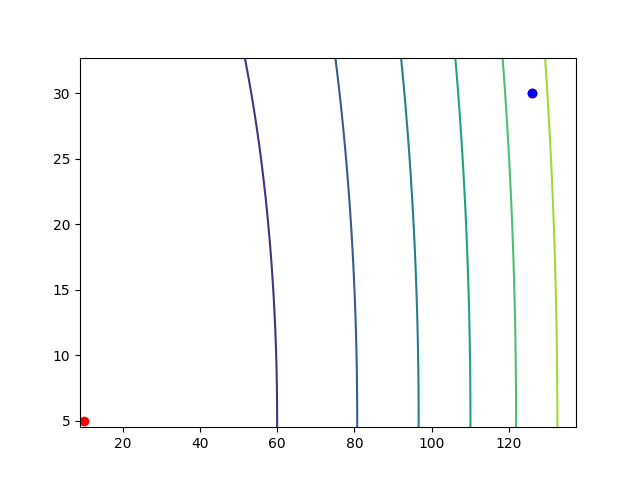

In [2]:
from src.v2.runner.runner import TABLE
from src.v2.impl.methods import GradientDescent

lmb = lambda x, y: (x - 10) ** 2 + (y - 5) ** 2
oracul = LambdaOracul(lmb)

min_point = np.array([10, 5])

animations = [Animator()]
metrics = [StepCount(), CallCount(), GradientCallCount(), HessianCallCount(), PrecisionCount(1),
           AbsolutePrecisionCount(0.001, min_point), AbsolutePrecision(min_point),
           MinAbsolutePrecision(min_point)]
conditions = [StepCountCondition(50), PrecisionCondition(0.0001),
              AbsolutePrecisionCondition(0.001, min_point)]

modules = animations + metrics + conditions

methods = [#GoldenRatioMethod(),
           CoordinateDescent(),
            GradientDescent()]
oraculs = [oracul]
point = np.array([126, 30])

result = Runner.run(methods, oraculs, point, modules, **FULL_DEBUG, **TABLE, **FULL_VISUALIZE, **FULL_ANIMATION)

plt.show()